## make sure you have all libraries installed. 
use conda environment: /scratch/da2734/twitter/worldbank_twitter_environment.yml

# loading random and filtered samples

In [2]:
# filtered contains 0.8G of data!!
import time
start_time = time.time()
import pyarrow.parquet as pq
from glob import glob
import os
country_code = 'US'
month = '2012-1'
path_to_data = '/scratch/spf248/twitter/data/classification/US/filtered_10perct_sample//'
tweets_filtered=pq.ParquetDataset(glob(os.path.join(path_to_data,                                           
#                                            country_code,
#                                            month,
                                           '*.parquet'))).read().to_pandas()
tweets_filtered['tweet_id'] = tweets_filtered['tweet_id'].astype(int)
print('time taken to load keyword filtered sample:', str(time.time() - start_time), 'seconds')
print(tweets_filtered.shape)

time taken to load keyword filtered sample: 35.2077853679657 seconds
(9215824, 11)


In [3]:
# random contains 0.8G of data!!
import time
start_time = time.time()
import pyarrow.parquet as pq
from glob import glob
import os
country_code = 'US'
month = '2012-1'
path_to_data = '/scratch/spf248/twitter/data/classification/US/random_10perct_sample/'
tweets_random=pq.ParquetDataset(glob(os.path.join(path_to_data,                                           
#                                            country_code,
#                                            month,
                                           '*.parquet'))).read().to_pandas()
tweets_random['tweet_id'] = tweets_random['tweet_id'].astype(int)
print('time taken to load random sample:', str(time.time() - start_time), 'seconds')
print(tweets_random.shape)

time taken to load random sample: 28.592449426651 seconds
(9468992, 11)


is_unemployed
time taken to load filtered sample: 0.2162315845489502 seconds (440264, 3)
time taken to load random sample: 0.23413753509521484 seconds (504964, 3)
time taken to merge: 6.09909725189209 seconds (440264, 13)
time taken to merge: 6.2488274574279785 seconds (440264, 13)
time taken to dump: 0.5672891139984131 seconds
is_unemployed
is_unemployed
        neg_model  pos_model  \
394794   0.043018   0.956982   
418035   0.043269   0.956731   
167805   0.044127   0.955873   
329261   0.044434   0.955566   
55825    0.044836   0.955164   

                                                     text  
394794  Technically un unemployed till my new job star...  
418035              Unemployed so I guess I'm successful.  
167805  @anchoredharrys I'm also unemployed after tomo...  
329261  @thereaderfilm there's a reason I'm basically ...  
55825                i quit my job yesterday for realsies  
        neg_model  pos_model  \
207769   0.974098   0.025902   
276432   0.973949   0.026

        neg_model  pos_model  \
274362   0.049630   0.950370   
492200   0.052659   0.947341   
240100   0.055247   0.944753   
511135   0.055393   0.944607   
66312    0.055961   0.944039   

                                                     text  
274362  Got let go 9/30 at 4:15p... found my new job 1...  
492200  Lol I was offered a contract to do plus size m...  
240100  Just got word &amp; Praying my new job send's ...  
511135  First day of work, not that bad I only panicke...  
66312   @Bery_MV about time, I started a new job and c...  
        neg_model  pos_model  \
131237   0.957058   0.042942   
203015   0.956596   0.043404   
243868   0.956416   0.043584   
303828   0.956348   0.043652   
353099   0.956183   0.043817   

                                                     text  
131237  Support For @HillaryClinton Drops 11 Points—\n...  
203015  https://t.co/jJyKubvkyX\n\nHuge public bet get...  
243868  RT @TheDemocrats: "On Economic Stupidity" — OR...  
303828  Pokemo

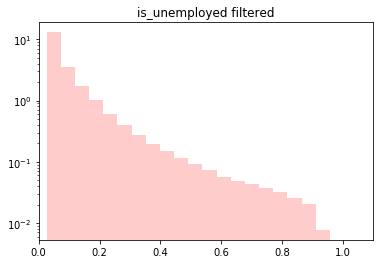

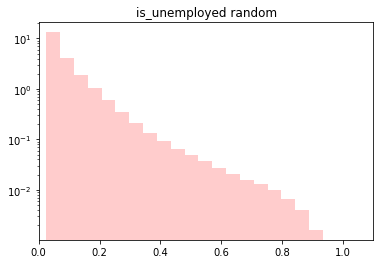

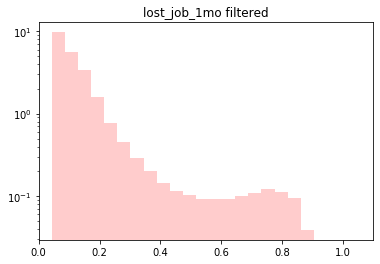

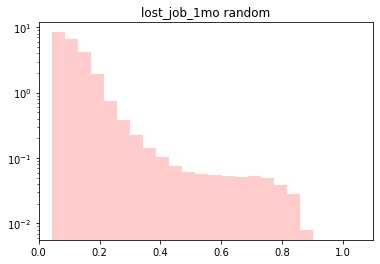

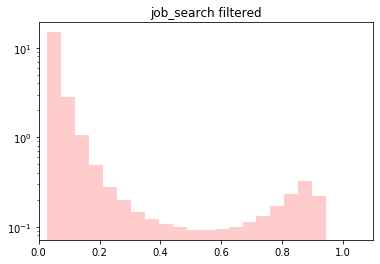

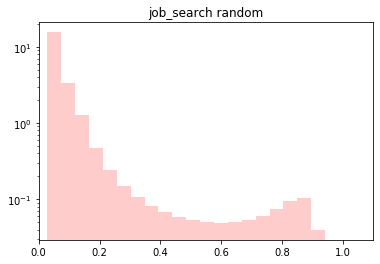

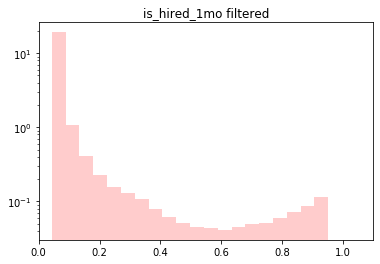

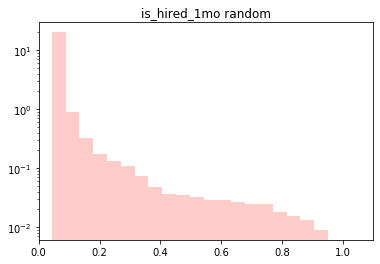

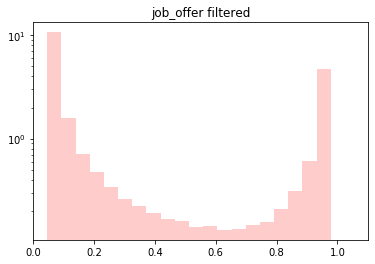

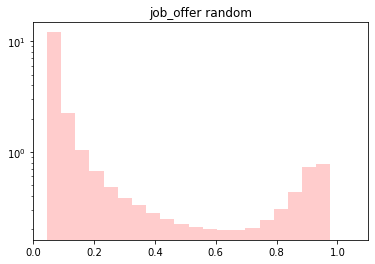

In [50]:
# all in one loop
import glob
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt

boundary = 0.5

for column in ["is_unemployed", "lost_job_1mo", "job_search", "is_hired_1mo", "job_offer"]:
    print(column)
    start_time = time.time()
    model_output_path = '/scratch/da2734/twitter/running_on_200Msamples/pred_output/{}/'.format(column)
    model_output_filtered = pd.concat([pd.read_csv(f) for f in glob.glob(model_output_path+'filtered*.csv')], ignore_index = True)
    print('time taken to load filtered sample:', str(time.time() - start_time), 'seconds', model_output_filtered.shape)


    start_time = time.time()
    model_output_random = pd.concat([pd.read_csv(f) for f in glob.glob(model_output_path+'random*.csv')], ignore_index = True)
    print('time taken to load random sample:', str(time.time() - start_time), 'seconds', model_output_random.shape)


    start_time = time.time()
    merged_filtered = pd.merge(model_output_filtered, tweets_filtered, how='inner', on = 'tweet_id')
    print('time taken to merge:', str(time.time() - start_time), 'seconds', merged_filtered.shape)

    start_time = time.time()
    merged_random = pd.merge(model_output_random, tweets_random, how='inner', on = 'tweet_id')
    print('time taken to merge:', str(time.time() - start_time), 'seconds', merged_filtered.shape)

    start_time = time.time()
    pickle.dump( merged_filtered, open( "./top_tweets/{}_merged_filtered.pkl".format(column), "wb" ) )
    pickle.dump( merged_random, open( "./top_tweets/{}_merged_random.pkl".format(column), "wb" ) )
    print('time taken to dump:', str(time.time() - start_time), 'seconds')

    merged_filtered = merged_filtered[['neg_model', 'pos_model', 'text']]
    merged_random   = merged_random[['neg_model', 'pos_model', 'text']]
    
    print(column)
    fig = plt.figure()
    ax = plt.subplot(111)
    plt.hist(merged_filtered['pos_model'], bins=20, density = True, color = 'red', alpha = 0.2)
    plt.title(column+' filtered')
    ax.set_yscale('log')
    plt.xlim(0,1.1)
    
    fig = plt.figure()
    ax = plt.subplot(111)
    plt.hist(merged_random['pos_model'], bins=20, density = True, color = 'red', alpha = 0.2)
    plt.title(column+' random')
    ax.set_yscale('log')
    plt.xlim(0,1.1)
    
    print(column)
    start_time = time.time()
    sort_merged_filtered = merged_filtered.sort_values(by=['pos_model'], ascending=False)
    sort_merged_filtered.head(100).to_csv('top_tweets/filtered_{}_pos_100.csv'.format(column))
    print(sort_merged_filtered.head())
    
    sort_merged_filtered = merged_filtered.sort_values(by=['pos_model'], ascending=True)
    sort_merged_filtered.head(100).to_csv('top_tweets/filtered_{}_neg_100.csv'.format(column))
    print(sort_merged_filtered.head())
    print('time taken to save csv:', str(time.time() - start_time), 'seconds')

    print(column)
    start_time = time.time()
    sort_merged_random = merged_random.sort_values(by=['pos_model'], ascending=False)
    sort_merged_random.head(100).to_csv('top_tweets/random_{}_pos_100.csv'.format(column))
    print(sort_merged_random.head())
    
    sort_merged_random = merged_random.sort_values(by=['pos_model'], ascending=True)
    sort_merged_random.head(100).to_csv('top_tweets/random_{}_neg_100.csv'.format(column))
    print(sort_merged_random.head())
    print('time taken to save csv:', str(time.time() - start_time), 'seconds')


    merged_filtered['dist_point5'] = abs(merged_filtered['pos_model'] - boundary)

    start_time = time.time()
    print(column, 'filtered subtraction time taken:', str(time.time() - start_time), 'seconds')

    start_time = time.time()
    merged_filtered = merged_filtered.sort_values(by=['dist_point5'], ascending=True)
    print(column, 'filtered sorting time taken:', str(time.time() - start_time), 'seconds')

    start_time = time.time()
    merged_filtered[:100].to_csv('top_tweets/filtered_{}_point5.csv'.format(column))
    # print(all_filtered_boundary['text'])
    print(column, 'filtered write csv time taken:', str(time.time() - start_time), 'seconds')


    merged_random['dist_point5'] = abs(merged_random['pos_model'] - boundary)

    start_time = time.time()
    print(column, 'random subtraction time taken:', str(time.time() - start_time), 'seconds')

    start_time = time.time()
    merged_random = merged_random.sort_values(by=['dist_point5'], ascending=True)
    print(column, 'random sorting time taken:', str(time.time() - start_time), 'seconds')

    start_time = time.time()
    merged_random[:100].to_csv('top_tweets/random_{}_point5.csv'.format(column))
    # print(all_random_boundary['text'])
    print(column, 'random write csv time taken:', str(time.time() - start_time), 'seconds')    
    
    
#     break

In [53]:
# all in one loop
import glob
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt

boundary = 0.5

for column in ["is_unemployed", "lost_job_1mo", "job_search", "is_hired_1mo", "job_offer"]:
    print(column)
    start_time = time.time()
    model_output_path = '/scratch/da2734/twitter/running_on_200Msamples/pred_output/{}/'.format(column)
    model_output_filtered = pd.concat([pd.read_csv(f) for f in glob.glob(model_output_path+'filtered*.csv')], ignore_index = True)
    print('time taken to load filtered sample:', str(time.time() - start_time), 'seconds', model_output_filtered.shape)


    start_time = time.time()
    model_output_random = pd.concat([pd.read_csv(f) for f in glob.glob(model_output_path+'random*.csv')], ignore_index = True)
    print('time taken to load random sample:', str(time.time() - start_time), 'seconds', model_output_random.shape)


    start_time = time.time()
    merged_filtered = pd.merge(model_output_filtered, tweets_filtered, how='inner', on = 'tweet_id')
    print('time taken to merge:', str(time.time() - start_time), 'seconds', merged_filtered.shape)

    start_time = time.time()
    merged_random = pd.merge(model_output_random, tweets_random, how='inner', on = 'tweet_id')
    print('time taken to merge:', str(time.time() - start_time), 'seconds', merged_filtered.shape)

#     start_time = time.time()
#     pickle.dump( merged_filtered, open( "./top_tweets/{}_merged_filtered.pkl".format(column), "wb" ) )
#     pickle.dump( merged_random, open( "./top_tweets/{}_merged_random.pkl".format(column), "wb" ) )
#     print('time taken to dump:', str(time.time() - start_time), 'seconds')

    merged_filtered = merged_filtered[['neg_model', 'pos_model', 'text']]
    merged_random   = merged_random[['neg_model', 'pos_model', 'text']]
    
#     print(column)
#     fig = plt.figure()
#     ax = plt.subplot(111)
#     plt.hist(merged_filtered['pos_model'], bins=20, density = True, color = 'red', alpha = 0.2)
#     plt.title(column+' filtered')
#     ax.set_yscale('log')
#     plt.xlim(0,1.1)
    
#     fig = plt.figure()
#     ax = plt.subplot(111)
#     plt.hist(merged_random['pos_model'], bins=20, density = True, color = 'red', alpha = 0.2)
#     plt.title(column+' random')
#     ax.set_yscale('log')
#     plt.xlim(0,1.1)
    
#     print(column)
#     start_time = time.time()
#     sort_merged_filtered = merged_filtered.sort_values(by=['pos_model'], ascending=False)
#     sort_merged_filtered.head(100).to_csv('top_tweets/filtered_{}_pos_100.csv'.format(column))
#     print(sort_merged_filtered.head())
    
#     sort_merged_filtered = merged_filtered.sort_values(by=['pos_model'], ascending=True)
#     sort_merged_filtered.head(100).to_csv('top_tweets/filtered_{}_neg_100.csv'.format(column))
#     print(sort_merged_filtered.head())
#     print('time taken to save csv:', str(time.time() - start_time), 'seconds')

#     print(column)
#     start_time = time.time()
#     sort_merged_random = merged_random.sort_values(by=['pos_model'], ascending=False)
#     sort_merged_random.head(100).to_csv('top_tweets/random_{}_pos_100.csv'.format(column))
#     print(sort_merged_random.head())
    
#     sort_merged_random = merged_random.sort_values(by=['pos_model'], ascending=True)
#     sort_merged_random.head(100).to_csv('top_tweets/random_{}_neg_100.csv'.format(column))
#     print(sort_merged_random.head())
#     print('time taken to save csv:', str(time.time() - start_time), 'seconds')


    merged_filtered['dist_point5'] = abs(merged_filtered['pos_model'] - boundary)

    start_time = time.time()
    print(column, 'filtered subtraction time taken:', str(time.time() - start_time), 'seconds')

    start_time = time.time()
    merged_filtered = merged_filtered.sort_values(by=['dist_point5'], ascending=True)
    print(column, 'filtered sorting time taken:', str(time.time() - start_time), 'seconds')

    start_time = time.time()
    merged_filtered[:100].to_csv('top_tweets/filtered_{}_point5.csv'.format(column))
    # print(all_filtered_boundary['text'])
    print(column, 'filtered write csv time taken:', str(time.time() - start_time), 'seconds')


    merged_random['dist_point5'] = abs(merged_random['pos_model'] - boundary)

    start_time = time.time()
    print(column, 'random subtraction time taken:', str(time.time() - start_time), 'seconds')

    start_time = time.time()
    merged_random = merged_random.sort_values(by=['dist_point5'], ascending=True)
    print(column, 'random sorting time taken:', str(time.time() - start_time), 'seconds')

    start_time = time.time()
    merged_random[:100].to_csv('top_tweets/random_{}_point5.csv'.format(column))
    # print(all_random_boundary['text'])
    print(column, 'random write csv time taken:', str(time.time() - start_time), 'seconds')    
    
    
#     break


is_unemployed
time taken to load filtered sample: 0.2151346206665039 seconds (440264, 3)
time taken to load random sample: 0.2391986846923828 seconds (504964, 3)
time taken to merge: 6.172555208206177 seconds (440264, 13)
time taken to merge: 6.2813944816589355 seconds (440264, 13)
is_unemployed filtered subtraction time taken: 2.86102294921875e-06 seconds
is_unemployed filtered sorting time taken: 0.12080597877502441 seconds
is_unemployed filtered write csv time taken: 0.0055005550384521484 seconds
is_unemployed random subtraction time taken: 1.6689300537109375e-06 seconds
is_unemployed random sorting time taken: 0.1376490592956543 seconds
is_unemployed random write csv time taken: 0.003409862518310547 seconds
lost_job_1mo
time taken to load filtered sample: 0.32298779487609863 seconds (528010, 3)
time taken to load random sample: 0.2732117176055908 seconds (589139, 3)
time taken to merge: 6.226088762283325 seconds (528010, 13)
time taken to merge: 6.275362968444824 seconds (528010, 1